<a href="https://colab.research.google.com/github/wayneotemah/AI-and-ML/blob/main/MnistClassificatioin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and visualise data

In [1]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


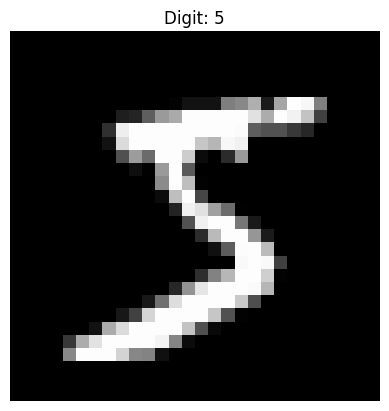

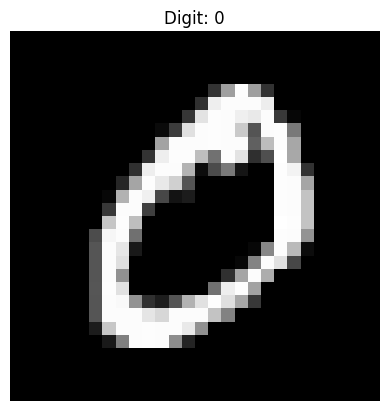

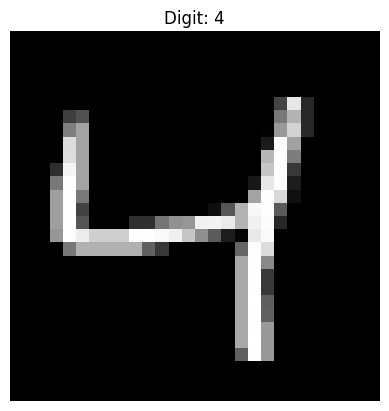

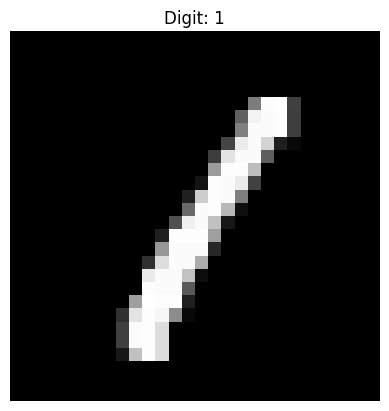

In [2]:
# visualise the data

import matplotlib.pyplot as plt

# Plot the first image from the training set
for i in range(0,4):
  plt.imshow(X_train[i], cmap='gray')
  plt.title('Digit: ' + str(y_train[i]))
  plt.axis('off')
  plt.show()

In [3]:
# viualise a labels:
y_test[0]

7

In [4]:
import numpy as np

# Get the unique instances in y_train
labels = np.unique(y_train)
print("labels to classify:", labels)
print("number of classes:", len(labels))

labels to classify: [0 1 2 3 4 5 6 7 8 9]
number of classes: 10


In [5]:
# visualize a sample data
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# sample data max and min values
X_test[0].max(),X_test[0].min()

(255, 0)

**NOTE**: the data ncan be  normalised for faster performance. Lets do this during fine tuning the data.

In [7]:
# data shape and dimentions
print(f"shape of sigle data :{X_train[0].shape}")
print(f"number od dimensions of a single data point: {X_train[0].ndim}")

shape of sigle data :(28, 28)
number od dimensions of a single data point: 2


# create the model


steps of model creation
1. create the model
2. compile the models
3. fit the model to test data
4. evaluate the model by train data
5. fine tune the model for better results
6. repeat



In [8]:
# create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # reshapes the input from 28 by 28 to 0,784(28*28), a 1d vector
    tf.keras.layers.Dense(4,activation = "relu"), # none linear activatioin funtion to since its a classification funtioin
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax"), # output shape is 10, activation is softmax

])

# compile
model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)



In [9]:
# model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [10]:
# fit the model
model_1history = model_1.fit(tf.constant(X_train),tf.constant(y_train),epochs = 10 )

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 2.3148 - accuracy: 0.1578
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9438 - accuracy: 0.2619
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6972 - accuracy: 0.3468
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5454 - accuracy: 0.4034
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3812 - accuracy: 0.4972
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1915 - accuracy: 0.5534
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0088 - accuracy: 0.6281
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9085 - accuracy: 0.6832
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8685 - accuracy: 0.7126
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.84

model take to long to train, nomize data to improve speeds

In [11]:
# Evaluate the models
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8361 - accuracy: 0.7447


[0.8360735177993774, 0.744700014591217]

In [12]:
y_pred = model_1.predict(X_train)

1875/1875 [==============================] - 3s 1ms/step


In [13]:
y_pred[0]

array([6.7068279e-01, 5.0044693e-03, 5.9824751e-04, 1.2405299e-01,
       6.1041233e-04, 1.6203344e-01, 4.9842260e-04, 2.7481108e-03,
       2.8524697e-02, 5.2463999e-03], dtype=float32)

In [14]:
# what us this number
3.1718656e-01

0.31718656

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.


In [15]:
# to get the actual values,
y_pred_values = y_pred.argmax(axis=1)

In [16]:
y_pred_values[0]

0

In [17]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

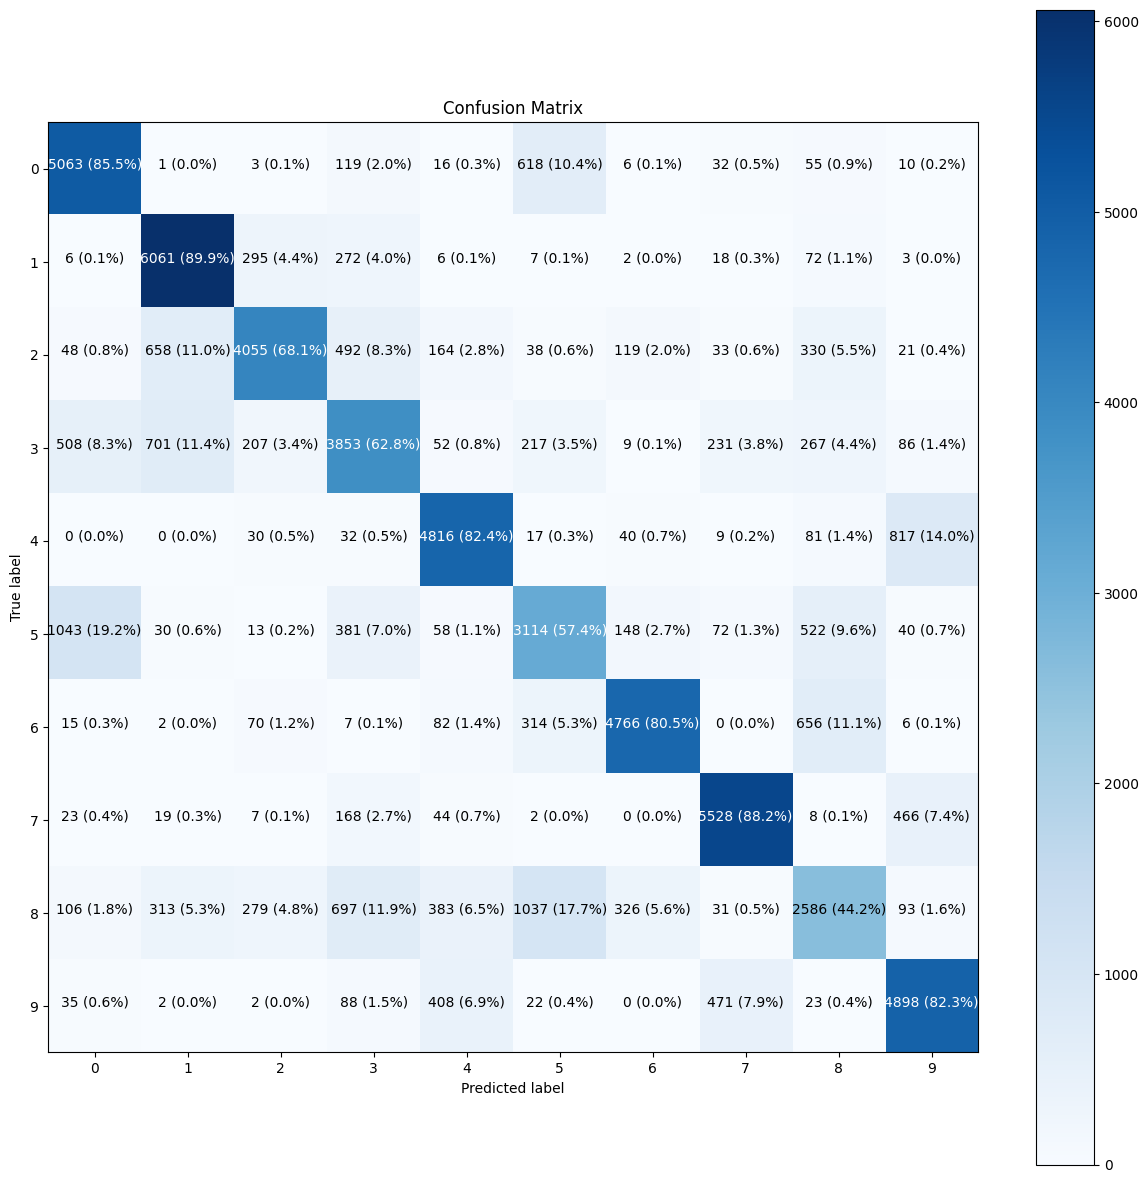

In [18]:
make_confusion_matrix(y_true=y_train,y_pred=y_pred_values, figsize=(15, 15),text_size=10)

from the metric their must be few 5 in the data set, lets check

In [ ]:
count_5 = np.count_nonzero(y_train == 5)
print(f"the number of digits in the taining set: {len(y_train)}")
print(f"the number of 5s in the traing set: {count_5}, this is {(count_5 / len(y_train)*100)}% ")


the number of digits in the taining set: 60000
the number of 5s in the traing set: 5421, this is 9.035% 


In [ ]:
len(y_train)

60000

the model_1 didnot to as well, lets normalize it

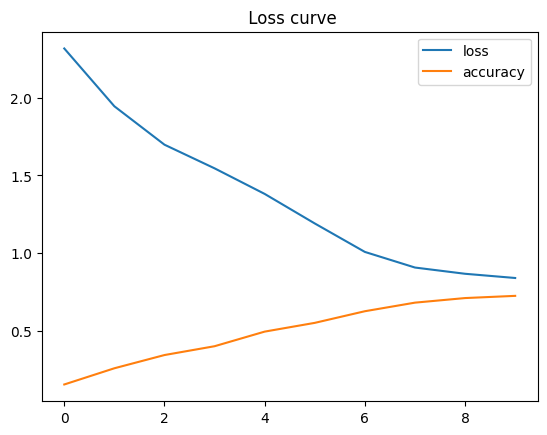

In [19]:
# visulaise training
import  pandas as pd 
# Plot normalized data loss curves
pd.DataFrame(model_1history.history).plot(title=" Loss curve");

# fine tuning

our options

1. normalize the data,
2. more neurons
3. train for longer
4. adjust learning rate

## normalizing

In [20]:
# normalizing data
X_train_normal = X_train/X_train.max()
y_train_normal = y_train/y_train.max()

X_test_normalized = X_test / X_test.max()

In [21]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax"), 

])

# compile
model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [23]:
# fit the model
model_2_history = model_2.fit(tf.constant(X_train_normal),tf.constant(y_train),epochs = 10 )

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 5.5125 - accuracy: 0.0987
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.9178 - accuracy: 0.1202
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1360 - accuracy: 0.1959
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0255 - accuracy: 0.2033
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0086 - accuracy: 0.2085
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9997 - accuracy: 0.2102
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9938 - accuracy: 0.2110
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9910 - accuracy: 0.2119
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9877 - accuracy: 0.2121
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.984

In [24]:
model_2.evaluate(X_test_normalized,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.9747 - accuracy: 0.2120


[1.9746646881103516, 0.21199999749660492]

The model had a less than 10% accuracy score 👎😔 even after normalization, lets try something else

# more neuron on hidden layers with highrt learning rate 

In [25]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [28]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax"), 

])

# compile
model_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy'],
)


In [34]:
model_3_history = model_3.fit(tf.constant(X_train_normal),tf.constant(y_train),epochs = 10 )

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - accuracy: 0.9946
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0131 - accuracy: 0.9959
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0141 - accuracy: 0.9958
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0115 - accuracy: 0.9963
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0130 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0106 - accuracy: 0.9965
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0124 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.011

In [35]:
model_3.evaluate(X_test_normalized,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.1145 - accuracy: 0.9797


[0.11445975303649902, 0.9797000288963318]

#model run with 97% accuracy on test data
